# Rectangle Algebra

In [1]:
import qualreas as qr
import os
import numpy as np

path = os.path.join(os.getenv('PYPROJ'), 'qualreas')

## Load the 2D Point Algebra

The 2-dimensional point algebra is based on the eight compass directions, N, S, E, W, NW, NE, SW, SE, and EQ (equals), and it is derived in the second half of the Jupyter notebook, "derive_point_algebras.ipynb".

In [2]:
ptalg2d = qr.Algebra(os.path.join(path, "Algebras/2D_Point_Algebra.json"))

In [3]:
ptalg2d.summary()

  Algebra Name: 2D_Point_Algebra
   Description: Autogenerated 2-dimensional point algebra
 Equality Rels: EQ
     Relations:
            NAME (SYMBOL)         CONVERSE (ABBREV)  REFLEXIVE  SYMMETRIC TRANSITIVE   DOMAIN        RANGE
              South (  S)               North (  N)    False      False       True       2DPt          2DPt
             Equals ( EQ)              Equals ( EQ)     True       True       True       2DPt          2DPt
              North (  N)               South (  S)    False      False       True       2DPt          2DPt
          Southwest ( SW)           Northeast ( NE)    False      False       True       2DPt          2DPt
               West (  W)                East (  E)    False      False       True       2DPt          2DPt
          Northwest ( NW)           Southeast ( SE)    False      False       True       2DPt          2DPt
          Southeast ( SE)           Northwest ( NW)    False      False       True       2DPt          2DPt
           

In [4]:
qr.print_point_algebra_composition_table(ptalg2d)

2D_Point_Algebra
Elements: S, EQ, N, SW, W, NW, SE, E, NE
 rel1 ; rel2 = composition
   S      S      S
   S     EQ      S
   S      N      S|EQ|N
   S     SW      SW
   S      W      SW
   S     NW      SW|W|NW
   S     SE      SE
   S      E      SE
   S     NE      SE|E|NE
------------------------------
  EQ      S      S
  EQ     EQ      EQ
  EQ      N      N
  EQ     SW      SW
  EQ      W      W
  EQ     NW      NW
  EQ     SE      SE
  EQ      E      E
  EQ     NE      NE
------------------------------
   N      S      S|EQ|N
   N     EQ      N
   N      N      N
   N     SW      SW|W|NW
   N      W      NW
   N     NW      NW
   N     SE      SE|E|NE
   N      E      NE
   N     NE      NE
------------------------------
  SW      S      SW
  SW     EQ      SW
  SW      N      SW|W|NW
  SW     SW      SW
  SW      W      SW
  SW     NW      SW|W|NW
  SW     SE      S|SW|SE
  SW      E      S|SW|SE
  SW     NE      S|EQ|N|SW|W|NW|SE|E|NE
------------------------------
   W      S

## Derive Rectangle Relations

### Define a Four Point Network (Class) for 2D Points

In [5]:
class Four2DPointNet(qr.Network):
    """Create four 2D Points that represent the coordinates of the upper-right (UR)
    and lower-left (LL) of two rectangles. For example, (LL1, UR1) and (LL2, UR2),
    where LL1 SW UR1, LL2 SW UR2, and SW is the 2DPoint relation southwest,
    represents two proper rectangles. Return the network and the four spatial entities."""
    def __init__(self, algebra, name, southwest="SW", lowerleft="LL", upperright="UR"):
        self.algebra = algebra
        self.SW = algebra.relset(southwest)
        # LL and UR coordinates of rectangle 1
        LL1 = lowerleft + "1"
        UR1 = upperright + "1"
        self.LL1 = qr.SpatialEntity(["2DPoint"], name=LL1)
        self.UR1 = qr.SpatialEntity(["2DPoint"], name=UR1)
        # LL and UR coordinates of rectangle 2
        LL2 = lowerleft + "2"
        UR2 = upperright + "2"
        self.LL2 = qr.SpatialEntity(["2DPoint"], name=LL2)
        self.UR2 = qr.SpatialEntity(["2DPoint"], name=UR2)
        self.name_list = [LL1, UR1, LL2, UR2]
        super().__init__(algebra, name)
        self.add_constraint(self.LL1, self.UR1, self.SW, verbose=False)
        self.add_constraint(self.LL2, self.UR2, self.SW, verbose=False)

    def get_points(self):
        return [self.LL1, self.UR1, self.LL2, self.UR2]

In [6]:
four_pt_net = Four2DPointNet(ptalg2d, "FourPtNet")

four_pt_net

The following few cells are just checks to make sure the the four point network looks OK.

In [7]:
four_pt_net.get_points()

[SpatialEntity(['2DPoint'] 'LL1'),
 SpatialEntity(['2DPoint'] 'UR1'),
 SpatialEntity(['2DPoint'] 'LL2'),
 SpatialEntity(['2DPoint'] 'UR2')]

In [8]:
four_pt_net.summary()


FourPtNet: 4 nodes, 8 edges
  Algebra: 2D_Point_Algebra
  LL1:['2DPoint']
    => LL1: EQ
    => UR1: SW
  UR1:['2DPoint']
    => UR1: EQ
  LL2:['2DPoint']
    => LL2: EQ
    => UR2: SW
  UR2:['2DPoint']
    => UR2: EQ


In [9]:
four_pt_net.propagate()

True

In [10]:
four_pt_net.summary()


FourPtNet: 4 nodes, 16 edges
  Algebra: 2D_Point_Algebra
  LL1:['2DPoint']
    => LL1: EQ
    => UR1: SW
    => LL2: S|EQ|N|SW|W|NW|SE|E|NE
    => UR2: S|EQ|N|SW|W|NW|SE|E|NE
  UR1:['2DPoint']
    => UR1: EQ
    => LL2: S|EQ|N|SW|W|NW|SE|E|NE
    => UR2: S|EQ|N|SW|W|NW|SE|E|NE
  LL2:['2DPoint']
    => LL2: EQ
    => UR2: SW
  UR2:['2DPoint']
    => UR2: EQ


## Derive the Consistent Networks for Proper Rectangles

In [11]:
def generate_consistent_2D_networks(point_algebra, lessthan=["SW"], startname="LL", endname="UR",
                                    verbose=False):
    """For a given point algebra and southwest relation, derive all possible consistent networks
    of 4 points, where the points represent the lower-left and upper-right of 2 rectangles."""
    consistent_nets = dict()
    for elem13 in point_algebra.elements:
        for elem23 in point_algebra.elements:
            for elem14 in point_algebra.elements:
                for elem24 in point_algebra.elements:
                    four_pt_net_name = elem13 + ',' + elem14 + ',' + elem23 + ',' + elem24
                    ptnet = Four2DPointNet(point_algebra, four_pt_net_name, lessthan, startname, endname)
                    pt1, pt2, pt3, pt4 = ptnet.get_points()
                    rs13 = point_algebra.relset(elem13)
                    rs14 = point_algebra.relset(elem14)
                    rs23 = point_algebra.relset(elem23)
                    rs24 = point_algebra.relset(elem24)
                    ptnet.add_constraint(pt1, pt3, rs13)
                    ptnet.add_constraint(pt1, pt4, rs14)
                    ptnet.add_constraint(pt2, pt3, rs23)
                    ptnet.add_constraint(pt2, pt4, rs24)
                    if ptnet.propagate():
                        elem_key = ",".join([str(rs13), str(rs14), str(rs23), str(rs24)])
                        consistent_nets[elem_key] = ptnet
                        if verbose:
                            print(np.array(ptnet.to_list()))
    print(f"\n{len(consistent_nets)} consistent networks")
    return consistent_nets

When we run the code below (with lessthan=["SW"]) then we will get 169 (i.e., 13x13) consistent 4 point networks, <b>and we do!</b>

In that case, each network corresponds to a unique configuration of two <b>proper</b> rectangles.

By <b>proper rectangle</b> we mean that the rectangles cannot degenerate into segments or points.

If we set lessthan=["W", "SW"], then line segments (0 height) can be considered to be rectangles, and we will get 234 configurations.  If we use "S", instead of "W", then 0-width line segments can be considered to be rectangles, and we will again get 234 configurations.

If lessthan=["EQ", "W", "SW"], then points can be considered to be (degenerate) rectangles, and we will get 261 configurations.

lessthan=["EQ", "W", "S", "SW"] yields 324 configurations of two (possibly degenerate) rectangles.

In [12]:
result_proper = generate_consistent_2D_networks(ptalg2d, lessthan=["SW"], verbose=False)


169 consistent networks


In [13]:
result_all = generate_consistent_2D_networks(ptalg2d, lessthan=["EQ", "W", "S", "SW"], verbose=False)


324 consistent networks


In [14]:
len(result_all)

324

## Assigning Names to the Rectangle Relations

To understand the naming scheme for rectangle relations, imagine the two rectangles being projected, as intervals, onto two 1-dimensional axes, one axis horizontal and the other axis vertical. Then obtain the names of the interval relations depicted on the two axes and concatenate them, horizontal-name:vertical-name, e.g., D:O (during:overlaps). For proper intervals, that will produce the $13^2=169$ rectangle relation names for the <i>result_proper</i> rectangle relations derived above. See the hand-drawn figure, farther below, for an illustration of this.

Then, it remains to map the each of the Four2DPointNet objects onto the proper rectangle name. This is done by mapping the compass directions (N, NW, S, SW, ...) to the linear point relations (<, =, >) for both the horizontal and vertical axes. This is done in the function, <i>relative_position</i>, defined below.

Each Four2DPointNet represents a 4x4 matrix, where the 2x2 partition in the upper-right represents the relationship between two rectangles, A & B. The four elements in that partition can be mapped to an existing key (e.g., '>,<,>,<') used in the dictionary <i>qualreas.signature_name_mapping</i>, which then maps to an interval name.

In [15]:
def relative_position(pt_rel):
    vert_pos = None
    horiz_pos = None

    if pt_rel in ["NW",  "N", "NE"]:
        vert_pos = ">"
    elif pt_rel in ["SW",  "S", "SE"]:
        vert_pos = "<"
    else:
        vert_pos = "="
            
    if pt_rel in ["E", "NE", "SE"]:
        horiz_pos = ">"
    elif pt_rel in ["W", "NW", "SW"]:
        horiz_pos = "<"
    else:
        horiz_pos = "="
    
    return horiz_pos, vert_pos

# This function is not used
def get_signature (net):
    arr = net.to_list()
    return arr[0][2], arr[0][3], arr[1][2], arr[1][3]

def get_keys(net_dict, ptalg2d_key):
    """Given a dictionary of consistent Four2DPointNet's, net_dict, like that output
    by 'generate_consistent_2D_networks', return the horizontal and vertical keys
    corresponding to interval relations.
    
    EXAMPLE: 
    result_proper = generate_consistent_2D_networks(ptalg2d, lessthan=["SW"], verbose=False)
    get_keys(result_proper, 'SE,SW,NE,SW') ==> ('>,<,>,<', '<,<,>,<')
    """
    ptnet = net_dict[ptalg2d_key]
    arr = ptnet.to_list()
    dirs2d = [arr[0][2], arr[0][3], arr[1][2], arr[1][3]]
    pos = list(map(relative_position, dirs2d))
    hkey = ','.join(map(lambda x: x[0], pos))
    vkey = ','.join(map(lambda x: x[1], pos))
    return hkey, vkey

def signature_name_2d(net_dict, ptalg2d_key, delimiter=":"):
    xy_keys = get_keys(net_dict, ptalg2d_key)
    x = qr.signature_name_mapping[xy_keys[0]]
    y = qr.signature_name_mapping[xy_keys[1]]
    return delimiter.join([x, y])

In [16]:
print("2D (horiz_rel, vert_rel):")
print("-------------------------")
for rel in ptalg2d.elements:
    print(rel, relative_position(rel))

2D (horiz_rel, vert_rel):
-------------------------
S ('=', '<')
EQ ('=', '=')
N ('=', '>')
SW ('<', '<')
W ('<', '=')
NW ('<', '>')
SE ('>', '<')
E ('>', '=')
NE ('>', '>')


In [29]:
ptalg2d_key = 'SE,SW,NE,SW'

In [30]:
ptnet = result_proper[ptalg2d_key]
ptnet.to_list()

[['EQ', 'SW', 'SE', 'SW'],
 ['NE', 'EQ', 'NE', 'SW'],
 ['NW', 'SW', 'EQ', 'SW'],
 ['NE', 'NE', 'NE', 'EQ']]

In [31]:
signature_name_2d(result_proper, ptalg2d_key)

'D:O'

The result 'D:0', above, is illustrated in the figure below.

Wrt the figure, the meaning is how rectangle A relates to rectangle B. That is, A D:0 B.

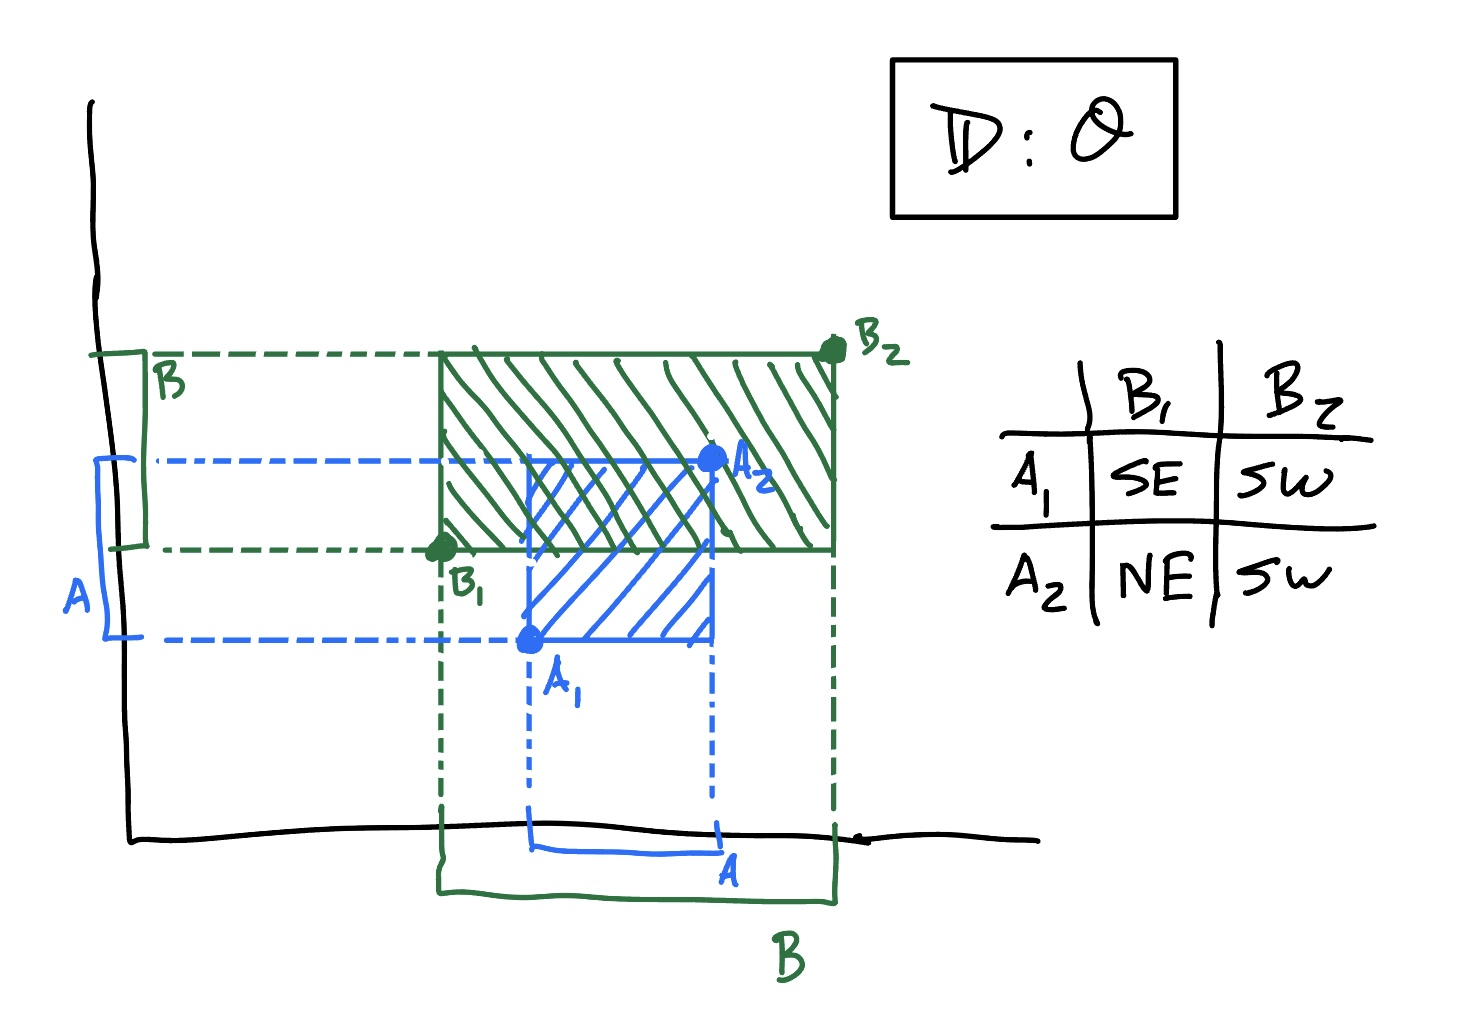

In [38]:
from IPython.display import Image
display(Image(filename='IMG_2285.jpeg', width=600))

Now, make sure that every Four2DPointNet can be assigned a name:

In [43]:
all_proper_2d_names = [signature_name_2d(result_proper, key) for key in result_proper.keys()]
print(all_proper_2d_names)

['E:B', 'S:B', 'SI:B', 'E:M', 'S:M', 'SI:M', 'E:O', 'E:FI', 'E:DI', 'S:O', 'S:FI', 'S:DI', 'SI:O', 'SI:FI', 'SI:DI', 'E:S', 'E:E', 'E:SI', 'S:S', 'S:E', 'S:SI', 'SI:S', 'SI:E', 'SI:SI', 'E:D', 'E:F', 'E:OI', 'S:D', 'S:F', 'S:OI', 'SI:D', 'SI:F', 'SI:OI', 'E:MI', 'S:MI', 'SI:MI', 'E:BI', 'S:BI', 'SI:BI', 'M:B', 'M:M', 'M:O', 'M:FI', 'M:DI', 'B:B', 'B:M', 'B:O', 'B:FI', 'B:DI', 'FI:B', 'O:B', 'DI:B', 'FI:M', 'O:M', 'DI:M', 'FI:O', 'FI:FI', 'FI:DI', 'O:O', 'O:FI', 'O:DI', 'DI:O', 'DI:FI', 'DI:DI', 'M:S', 'M:E', 'M:SI', 'B:S', 'B:E', 'B:SI', 'FI:S', 'FI:E', 'FI:SI', 'O:S', 'O:E', 'O:SI', 'DI:S', 'DI:E', 'DI:SI', 'M:D', 'M:F', 'M:OI', 'M:MI', 'M:BI', 'B:D', 'B:F', 'B:OI', 'B:MI', 'B:BI', 'FI:D', 'FI:F', 'FI:OI', 'O:D', 'O:F', 'O:OI', 'DI:D', 'DI:F', 'DI:OI', 'FI:MI', 'O:MI', 'DI:MI', 'FI:BI', 'O:BI', 'DI:BI', 'MI:B', 'F:B', 'D:B', 'OI:B', 'BI:B', 'MI:M', 'F:M', 'D:M', 'OI:M', 'BI:M', 'MI:O', 'MI:FI', 'MI:DI', 'F:O', 'F:FI', 'F:DI', 'D:O', 'D:FI', 'D:DI', 'OI:O', 'OI:FI', 'OI:DI', 'BI:O', 'B

In [44]:
len(all_proper_2d_names)

169

How about doing the same for the extended rectangle definitions (includes horizontal segments, vertical segments, and points)?

In [45]:
all_2d_names = [signature_name_2d(result_all, key) for key in result_all.keys()]
print(all_2d_names)

['PE:B', 'PS:B', 'PE:M', 'PE:PFI', 'PS:M', 'PS:PFI', 'PE:O', 'PE:FI', 'PE:DI', 'PS:O', 'PS:FI', 'PS:DI', 'PSI:B', 'E:B', 'S:B', 'SI:B', 'PSI:M', 'PSI:PFI', 'E:M', 'E:PFI', 'S:M', 'S:PFI', 'SI:M', 'SI:PFI', 'PSI:O', 'PSI:FI', 'PSI:DI', 'E:O', 'E:FI', 'E:DI', 'S:O', 'S:FI', 'S:DI', 'SI:O', 'SI:FI', 'SI:DI', 'PE:PS', 'PE:PE', 'PS:PS', 'PS:PE', 'PE:S', 'PE:E', 'PE:SI', 'PE:PSI', 'PS:S', 'PS:E', 'PS:SI', 'PS:PSI', 'PSI:PS', 'PSI:PE', 'E:PS', 'S:PS', 'SI:PS', 'E:PE', 'S:PE', 'SI:PE', 'PSI:S', 'PSI:E', 'PSI:SI', 'PSI:PSI', 'E:S', 'E:E', 'E:SI', 'S:S', 'S:E', 'S:SI', 'SI:S', 'SI:E', 'SI:SI', 'E:PSI', 'S:PSI', 'SI:PSI', 'PE:D', 'PE:F', 'PE:OI', 'PE:PF', 'PE:MI', 'PE:BI', 'PS:D', 'PS:F', 'PS:OI', 'PS:PF', 'PS:MI', 'PS:BI', 'PSI:D', 'PSI:F', 'PSI:OI', 'PSI:PF', 'PSI:MI', 'PSI:BI', 'E:D', 'E:F', 'E:OI', 'S:D', 'S:F', 'S:OI', 'SI:D', 'SI:F', 'SI:OI', 'E:PF', 'E:MI', 'S:PF', 'S:MI', 'SI:PF', 'SI:MI', 'E:BI', 'S:BI', 'SI:BI', 'PFI:B', 'M:B', 'PFI:M', 'PFI:PFI', 'M:M', 'M:PFI', 'PFI:O', 'PFI:FI', 'PFI

In [46]:
len(all_2d_names)

324

In [48]:
18**2

324